# Tarea 3. Midiendo rendimiento y riesgo.

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2018 hasta el 31 de diciembre del 2023.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [58]:
import yfinance as yf

In [59]:
# Función para descargar precios de cierre ajustados:
def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets, start=start, end=end)['Adj Close']

In [60]:
# Información
names = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'T', 'JNJ', 'PG', 'XOM', 'JPM', 'KO', 'DIS', 'GS', 'INTC', 'IBM', 'CSCO']
start_date = '2018-01-01'
end_date = '2018-12-31'

In [61]:
# Precios diarios
closes = get_adj_close(tickets=names,
                        start=start_date,
                      end = end_date)
closes.head()

[*********************100%%**********************]  15 of 15 completed


Ticker,AAPL,AMZN,CSCO,DIS,GOOGL,GS,IBM,INTC,JNJ,JPM,KO,MSFT,PG,T,XOM
Date,,,,,,,,,,,,,,,
2018-01-02,40.722878,59.450500,32.156822,108.372864,53.660500,223.935043,110.546417,39.857132,118.394829,90.125511,37.655880,80.229004,76.669670,17.768673,63.220600
2018-01-03,40.715786,60.209999,32.413338,108.838142,54.576000,221.850464,113.585136,38.504456,119.525810,90.217361,37.573181,80.602379,76.576614,17.358349,64.462257
2018-01-04,40.904907,60.479500,32.505043,108.789688,54.787998,224.951080,115.885605,37.798351,119.517319,91.509758,38.102390,81.311798,77.117935,17.519714,64.551491
2018-01-05,41.370628,61.457001,32.955223,108.198372,55.514500,223.803680,116.451790,38.062073,120.503738,90.922287,38.094120,82.319908,77.168678,17.584263,64.499435
2018-01-08,41.216957,62.343498,33.297035,106.647423,55.710499,220.554184,117.154114,38.062073,120.656822,91.056587,38.036236,82.403915,77.574654,17.634975,64.789406


<AxesSubplot:xlabel='Date'>

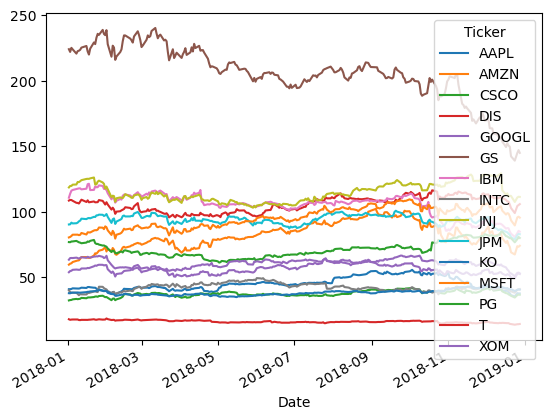

In [62]:
# Gráfico de histórico de precios diarios
closes.plot()

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [96]:
# Método shift() de un DataFrame...
help(closes.shift)

Help on method shift in module pandas.core.frame:

shift(periods=1, freq: 'Frequency | None' = None, axis: 'Axis' = 0, fill_value=<no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Shift index by desired number of periods with an optional time `freq`.
    
    When `freq` is not passed, shift the index without realigning the data.
    If `freq` is passed (in this case, the index must be date or datetime,
    or it will raise a `NotImplementedError`), the index will be
    increased using the periods and the `freq`. `freq` can be inferred
    when specified as "infer" as long as either freq or inferred_freq
    attribute is set in the index.
    
    Parameters
    ----------
    periods : int
        Number of periods to shift. Can be positive or negative.
    freq : DateOffset, tseries.offsets, timedelta, or str, optional
        Offset to use from the tseries module or time rule (e.g. 'EOM').
        If `freq` is specified then the index values are shifte

In [97]:
closes.head()

Ticker,AAPL,AMZN,CSCO,DIS,GOOGL,GS,IBM,INTC,JNJ,JPM,KO,MSFT,PG,T,XOM
Date,,,,,,,,,,,,,,,
2018-01-02,40.722878,59.450500,32.156822,108.372864,53.660500,223.935043,110.546417,39.857132,118.394829,90.125511,37.655880,80.229004,76.669670,17.768673,63.220600
2018-01-03,40.715786,60.209999,32.413338,108.838142,54.576000,221.850464,113.585136,38.504456,119.525810,90.217361,37.573181,80.602379,76.576614,17.358349,64.462257
2018-01-04,40.904907,60.479500,32.505043,108.789688,54.787998,224.951080,115.885605,37.798351,119.517319,91.509758,38.102390,81.311798,77.117935,17.519714,64.551491
2018-01-05,41.370628,61.457001,32.955223,108.198372,55.514500,223.803680,116.451790,38.062073,120.503738,90.922287,38.094120,82.319908,77.168678,17.584263,64.499435
2018-01-08,41.216957,62.343498,33.297035,106.647423,55.710499,220.554184,117.154114,38.062073,120.656822,91.056587,38.036236,82.403915,77.574654,17.634975,64.789406


In [98]:
closes.shift().head()

Ticker,AAPL,AMZN,CSCO,DIS,GOOGL,GS,IBM,INTC,JNJ,JPM,KO,MSFT,PG,T,XOM
Date,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,40.722878,59.450500,32.156822,108.372864,53.660500,223.935043,110.546417,39.857132,118.394829,90.125511,37.655880,80.229004,76.669670,17.768673,63.220600
2018-01-04,40.715786,60.209999,32.413338,108.838142,54.576000,221.850464,113.585136,38.504456,119.525810,90.217361,37.573181,80.602379,76.576614,17.358349,64.462257
2018-01-05,40.904907,60.479500,32.505043,108.789688,54.787998,224.951080,115.885605,37.798351,119.517319,91.509758,38.102390,81.311798,77.117935,17.519714,64.551491
2018-01-08,41.370628,61.457001,32.955223,108.198372,55.514500,223.803680,116.451790,38.062073,120.503738,90.922287,38.094120,82.319908,77.168678,17.584263,64.499435


In [99]:
daily_returns = closes.pct_change()

In [100]:
# Mostrar el DataFrame de rendimientos porcentuales diarios
print("DataFrame de Rendimientos Porcentuales Diarios:")
print(daily_returns.head())


DataFrame de Rendimientos Porcentuales Diarios:
Ticker          AAPL      AMZN      CSCO       DIS     GOOGL        GS  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03 -0.000174  0.012775  0.007977  0.004293  0.017061 -0.009309   
2018-01-04  0.004645  0.004476  0.002829 -0.000445  0.003884  0.013976   
2018-01-05  0.011385  0.016163  0.013850 -0.005435  0.013260 -0.005101   
2018-01-08 -0.003715  0.014425  0.010372 -0.014334  0.003531 -0.014519   

Ticker           IBM      INTC       JNJ       JPM        KO      MSFT  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.027488 -0.033938  0.009553  0.001019 -0.002196  0.004654   
2018-01-04  0.020253 -0.018338 -0.000071  0.014325  0.014085  0.008801   
2018-01-05  0.004886  0.006977  0.008253 -0.006420 -0.000217  0

[*********************100%%**********************]  15 of 15 completed


DataFrame de Rendimientos Porcentuales Diarios:
Ticker          AAPL      AMZN      CSCO       DIS     GOOGL        GS  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03 -0.000174  0.012775  0.007977  0.004293  0.017061 -0.009309   
2018-01-04  0.004645  0.004476  0.002829 -0.000445  0.003884  0.013976   
2018-01-05  0.011385  0.016163  0.013850 -0.005435  0.013260 -0.005101   
2018-01-08 -0.003715  0.014425  0.010372 -0.014334  0.003531 -0.014519   

Ticker           IBM      INTC       JNJ       JPM        KO      MSFT  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.027488 -0.033938  0.009553  0.001019 -0.002196  0.004654   
2018-01-04  0.020253 -0.018338 -0.000071  0.014325  0.014085  0.008801   
2018-01-05  0.004886  0.006977  0.008253 -0.006420 -0.000217  0

<Figure size 1000x600 with 0 Axes>

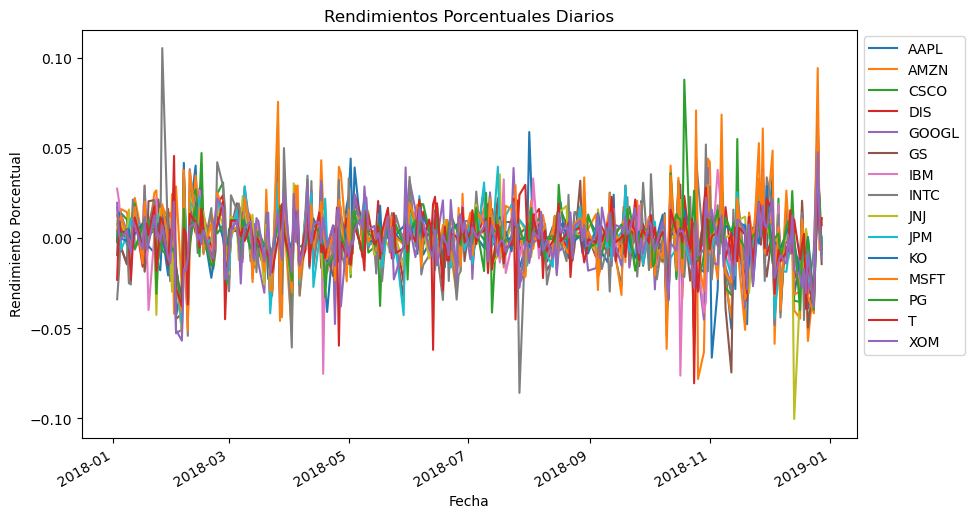

In [101]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Función para descargar precios de cierre ajustados:
def get_adj_close(tickers, start=None, end=None):
    return yf.download(tickers, start=start, end=end)['Adj Close']

# Información
names = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'T', 'JNJ', 'PG', 'XOM', 'JPM', 'KO', 'DIS', 'GS', 'INTC', 'IBM', 'CSCO']
start_date = '2018-01-01'
end_date = '2018-12-31'

# Precios diarios
closes = get_adj_close(tickers=names, start=start_date, end=end_date)

# Calcular rendimientos porcentuales diarios
daily_returns = closes.pct_change()

# Mostrar el DataFrame de rendimientos porcentuales diarios
print("DataFrame de Rendimientos Porcentuales Diarios:")
print(daily_returns.head())

# Graficar los rendimientos porcentuales
plt.figure(figsize=(10, 6))
daily_returns.plot(title='Rendimientos Porcentuales Diarios', figsize=(10, 6))
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Porcentual')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [85]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame llamado 'daily_returns' con los rendimientos diarios

# Calcular el rendimiento medio diario
mean_daily_returns = daily_returns.mean()

# Anualizar los rendimientos multiplicando por el número de días hábiles en un año (252)
annual_mean_returns = 252 * mean_daily_returns

# Crear un DataFrame para reportar los resultados
resultados_rendimientos = pd.DataFrame({
    'Rendimiento Medio Diario': mean_daily_returns,
    'Rendimiento Anualizado': annual_mean_returns
})

# Mostrar el DataFrame con los resultados
print("Resultados de rendimientos:")
print(resultados_rendimientos)


Resultados de rendimientos:
        Rendimiento Medio Diario  Rendimiento Anualizado
Ticker                                                  
AAPL                   -0.000168               -0.042448
AMZN                    0.001133                0.285628
CSCO                    0.000644                0.162378
DIS                    -0.000018               -0.004446
GOOGL                   0.000058                0.014601
GS                     -0.001620               -0.408217
IBM                    -0.000949               -0.239029
INTC                    0.000320                0.080662
JNJ                    -0.000156               -0.039350
JPM                    -0.000248               -0.062538
KO                      0.000325                0.081943
MSFT                    0.000852                0.214581
PG                      0.000236                0.059565
T                      -0.000800               -0.201697
XOM                    -0.000629               -0.158500


In [87]:
import numpy as np

# Suponiendo que ya tienes un DataFrame llamado 'daily_returns' con los rendimientos diarios

# Calcular la volatilidad diaria
daily_volatility = daily_returns.std()

# Anualizar la volatilidad multiplicando por la raíz cuadrada del número de días hábiles en un año (252)
annual_volatility = np.sqrt(252) * daily_volatility

# Crear un DataFrame para reportar los resultados
resultados_volatilidad = pd.DataFrame({
    'Volatilidad Diaria': daily_volatility,
    'Volatilidad Anualizada': annual_volatility
})

# Mostrar el DataFrame con los resultados
print("\nResultados de volatilidad:")
print(resultados_volatilidad)



Resultados de volatilidad:
        Volatilidad Diaria  Volatilidad Anualizada
Ticker                                            
AAPL              0.018132                0.287837
AMZN              0.022794                0.361845
CSCO              0.016696                0.265036
DIS               0.012978                0.206024
GOOGL             0.017796                0.282507
GS                0.016137                0.256161
IBM               0.015555                0.246921
INTC              0.021463                0.340713
JNJ               0.013821                0.219398
JPM               0.013963                0.221663
KO                0.009468                0.150302
MSFT              0.017861                0.283538
PG                0.012223                0.194029
T                 0.014787                0.234737
XOM               0.013793                0.218955


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [89]:
import pandas as pd
import numpy as np 

In [90]:
# Resumen en base anual
annual_ret_summary = pd.DataFrame({'Media': 252 * daily_returns.mean(), 'Vol': np.sqrt(252) * daily_returns.std()})
annual_ret_summary

,Media,Vol
Ticker,,
AAPL,-0.042448,0.287837
AMZN,0.285628,0.361845
CSCO,0.162378,0.265036
DIS,-0.004446,0.206024
GOOGL,0.014601,0.282507
GS,-0.408217,0.256161
IBM,-0.239029,0.246921
INTC,0.080662,0.340713
JNJ,-0.039350,0.219398


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

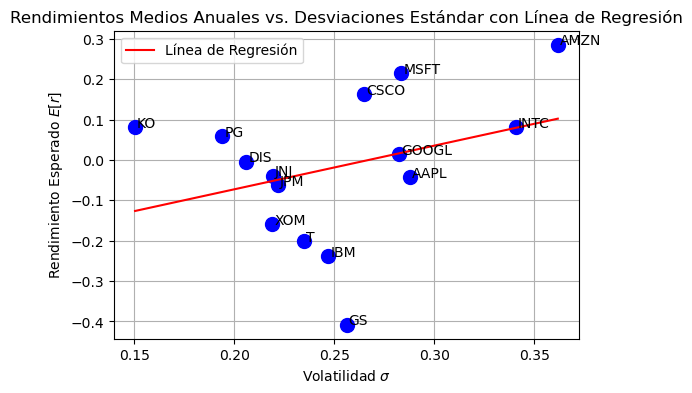

Ecuación de la Línea de Regresión:
$E[r] = 1.08 \cdot \sigma + -0.29$


In [95]:
from scipy.stats import linregress

# Ajustar una línea recta a los puntos
slope, intercept, r_value, p_value, std_err = linregress(annual_ret_summary['Vol'], annual_ret_summary['Media'])

# Crear la ecuación de la línea recta
line_equation = f'$E[r] = {slope:.2f} \cdot \sigma + {intercept:.2f}$'

# Mostrar el gráfico original con la línea recta ajustada
plt.figure(figsize=(6, 4))
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.001, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])

# Agregar la línea de regresión al gráfico
volatility_range = np.linspace(annual_ret_summary['Vol'].min(), annual_ret_summary['Vol'].max(), 100)
plt.plot(volatility_range, slope * volatility_range + intercept, color='red', label='Línea de Regresión')
plt.title('Rendimientos Medios Anuales vs. Desviaciones Estándar con Línea de Regresión')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.legend()
plt.grid()
plt.show()

# Mostrar la ecuación de la línea recta
print('Ecuación de la Línea de Regresión:')
print(line_equation)


## 3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

En conclusion veo una recta que va asendiendo y donde la mayoria de las acciones tienen mucha volatilidad pero no vale la pena invertir por el rendimiento. a mi gusto las empresas que valen la pena invertir tomando en cuenta rend vs Volatilidad son: "KO", "PG", "DIS", "INI". ya que las siguientes es mucha volatilidad y termina siendo poarecido el rendimiento.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Carlos Kelly.
</footer>